In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 요일별 시간

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import time
import squarify

In [ ]:
# pd.set_option('display.max_rows',None)

In [ ]:
Netflix = pd.read_csv("/content/drive/MyDrive/paprika/ViewingActivity.csv")
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)"
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)"
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)"
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)"
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)"


In [ ]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             19161 non-null  object
 1   Start Time               19161 non-null  object
 2   Duration                 19161 non-null  object
 3   Attributes               8441 non-null   object
 4   Title                    19161 non-null  object
 5   Supplemental Video Type  3810 non-null   object
 6   Device Type              19160 non-null  object
 7   Bookmark                 19161 non-null  object
 8   Latest Bookmark          19161 non-null  object
 9   Country                  19161 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


In [ ]:
Netflix["Start Time"] = pd.to_datetime(Netflix["Start Time"])

In [ ]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             19161 non-null  object        
 1   Start Time               19161 non-null  datetime64[ns]
 2   Duration                 19161 non-null  object        
 3   Attributes               8441 non-null   object        
 4   Title                    19161 non-null  object        
 5   Supplemental Video Type  3810 non-null   object        
 6   Device Type              19160 non-null  object        
 7   Bookmark                 19161 non-null  object        
 8   Latest Bookmark          19161 non-null  object        
 9   Country                  19161 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.5+ MB


In [ ]:
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)"
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)"
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)"
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)"
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)"


## 날짜 분리
연도 / 월 / 일 / 요일

In [ ]:
Netflix["Year"] = Netflix["Start Time"].dt.year
Netflix["Month"] = Netflix["Start Time"].dt.month
Netflix["Day"] = Netflix["Start Time"].dt.day
Netflix["Day_name"] = Netflix["Start Time"].dt.day_name()
Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",2019,2,9,Saturday
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday


## 시간 분리
시 / 분 / 초

In [ ]:
Netflix["Hour"] = Netflix["Start Time"].dt.hour
Netflix["Minute"] = Netflix["Start Time"].dt.minute
Netflix["Second"] = Netflix["Start Time"].dt.second
Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,25,19
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,20,35
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",2019,2,9,Saturday,4,8,47
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,3,10,57


# 요일별 본 횟수 시각화

중복 값 제거 X

In [ ]:
day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [ ]:
Netflix.groupby('Day_name').size()

Day_name
Friday       2685
Monday       1795
Saturday     4245
Sunday       3508
Thursday     2369
Tuesday      2297
Wednesday    2262
dtype: int64

## 막대 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


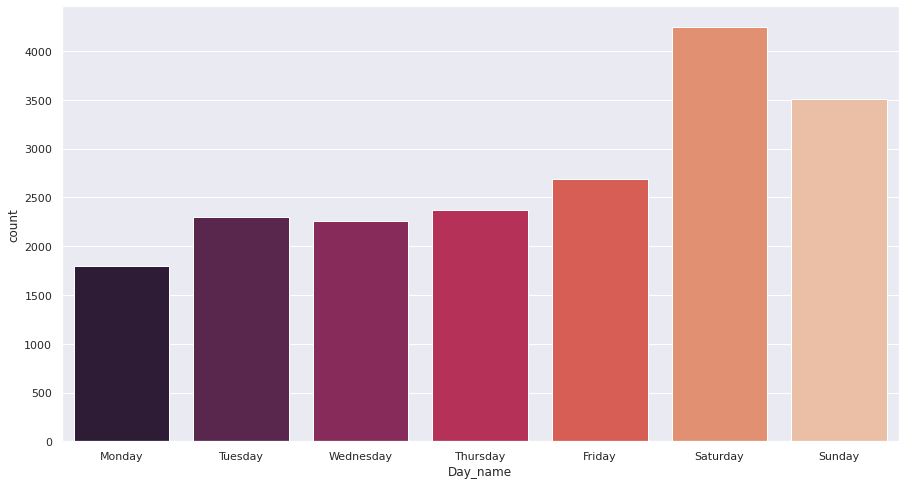

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(Netflix["Day_name"], order=day_name, palette="rocket")

## 레이더 차트

In [ ]:
19161/7


2737.285714285714

In [ ]:
labels = day_name
labels

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
Netflix.groupby('Day_name').size()

Day_name
Friday       2685
Monday       1795
Saturday     4245
Sunday       3508
Thursday     2369
Tuesday      2297
Wednesday    2262
dtype: int64

In [ ]:
day_name_df=pd.DataFrame(Netflix.groupby('Day_name').size(),columns=["count"])
day_name_df

,count
Day_name,
Friday,2685
Monday,1795
Saturday,4245
Sunday,3508
Thursday,2369
Tuesday,2297
Wednesday,2262


In [ ]:
day_name_df = day_name_df.reindex(day_name)
day_name_df

,count
Day_name,
Monday,1795
Tuesday,2297
Wednesday,2262
Thursday,2369
Friday,2685
Saturday,4245
Sunday,3508


No handles with labels found to put in legend.


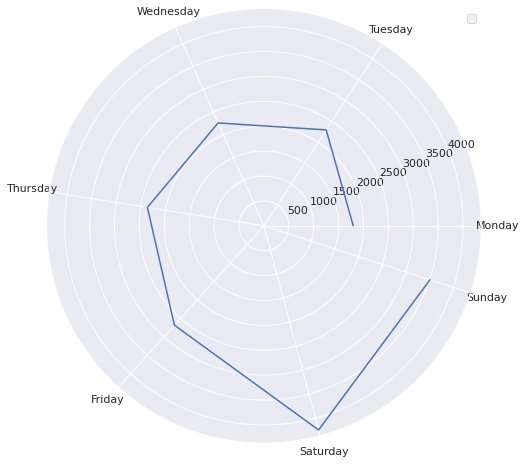

In [ ]:
label_loc = np.linspace(start=0, stop=1.9*np.pi, num=len(day_name_df))



plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, day_name_df["count"])
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=day_name)
plt.legend()
plt.show()

# 요일별 본 시간 시각화

요일별로 duration 합치기



In [ ]:
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48


In [ ]:
Netflix["Duration_hour"] = Netflix['Duration'].apply(lambda x : x.split(':')[0])
Netflix["Duration_min"] = Netflix['Duration'].apply(lambda x : x.split(':')[1])
Netflix["Duration_sec"] = Netflix['Duration'].apply(lambda x : x.split(':')[2])
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20,00,00,05
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38,00,00,04
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20,00,00,04
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8,00,01,54
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48,00,00,17


In [ ]:
Netflix['Duration_sec_sum'] = Netflix["Duration_sec"].map(int) + Netflix["Duration_min"].apply(lambda x : int(x)*60) + Netflix["Duration_hour"].apply(lambda x : int(x)*60)
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",...,5,31,Monday,2,25,20,00,00,05,5
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,38,00,00,04,4
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,20,00,00,04,4
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",...,5,30,Sunday,14,5,48,00,00,17,17


### duration 초(시간단위)로 바꾸기

In [ ]:
Duration_seconds_sum = Netflix.groupby(["Day_name"])['Duration_sec_sum'].sum()
Duration_seconds_sum

Day_name
Friday       1887486
Monday       1412542
Saturday     2973857
Sunday       2585885
Thursday     1712603
Tuesday      1679127
Wednesday    1606501
Name: Duration_sec_sum, dtype: int64

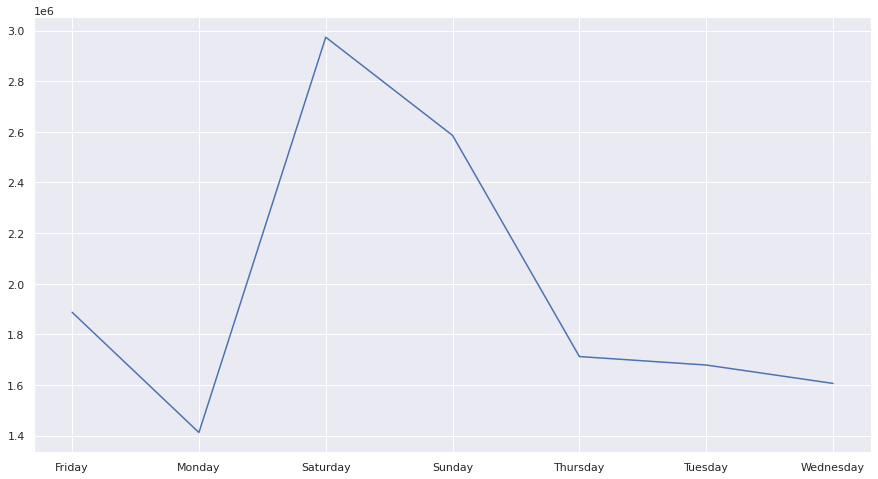

In [ ]:
plt.plot(Duration_seconds_sum)

### duration 분(시간단위)로 바꾸기

In [ ]:
Duration_min_sum = round(Netflix.groupby(["Day_name"])['Duration_sec_sum'].sum()/60,2)
Duration_min_sum

Day_name
Friday       31458.10
Monday       23542.37
Saturday     49564.28
Sunday       43098.08
Thursday     28543.38
Tuesday      27985.45
Wednesday    26775.02
Name: Duration_sec_sum, dtype: float64

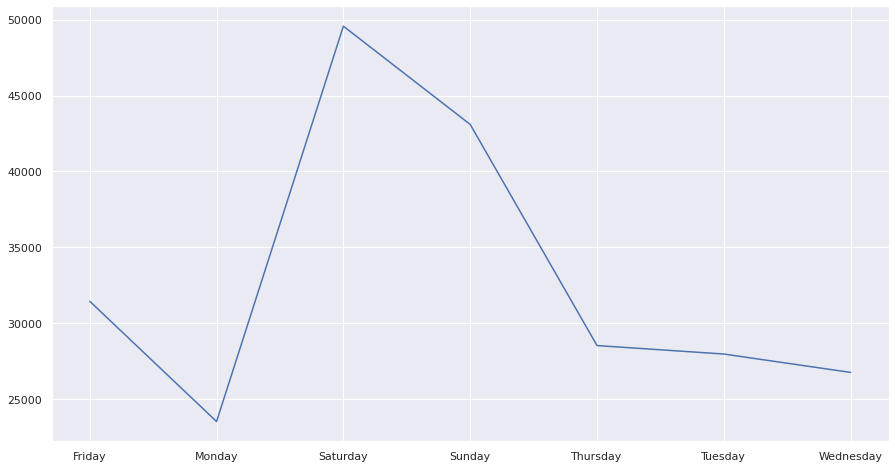

In [ ]:
plt.plot(Duration_min_sum)

### duration 시(시간단위)로 바꾸기

In [ ]:
Duration_hour_sum = round(Netflix.groupby(["Day_name"])['Duration_sec_sum'].sum()/3600,2)
Duration_hour_sum

Day_name
Friday       524.30
Monday       392.37
Saturday     826.07
Sunday       718.30
Thursday     475.72
Tuesday      466.42
Wednesday    446.25
Name: Duration_sec_sum, dtype: float64

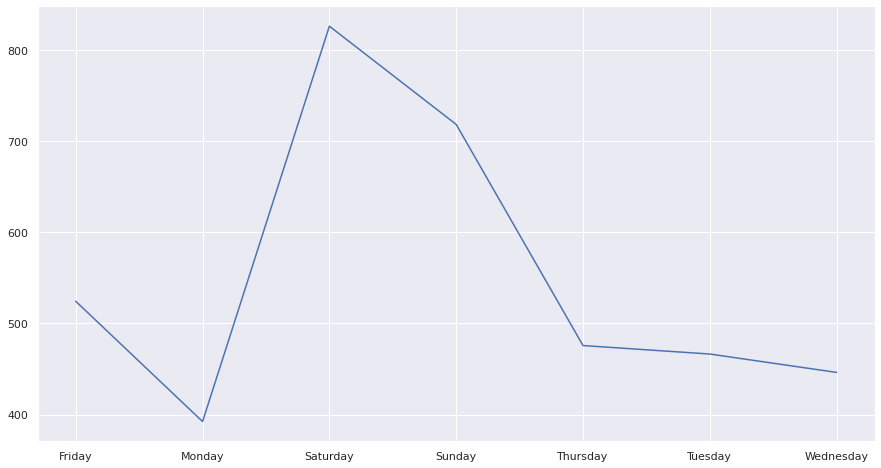

In [ ]:
plt.plot(Duration_hour_sum)

([<matplotlib.patches.Wedge at 0x7f88c1986c50>,
 [Text(1.0008271383230685, 0.45644828753765476, 'Monday'),
  Text(0.4230793286721651, 1.0153836130499203, 'Tuesday'),
  Text(-0.6207421055601541, 0.908118515605065, 'Wednesday'),
  Text(-1.054322165613548, -0.31369534758417855, 'Thursday'),
  Text(-0.33256947291798095, -1.0485216000078665, 'Friday'),
  Text(0.4900730258474037, -0.9847986745202139, 'Saturday'),
  Text(1.0278526713639435, -0.3918148618544292, 'Sunday')])

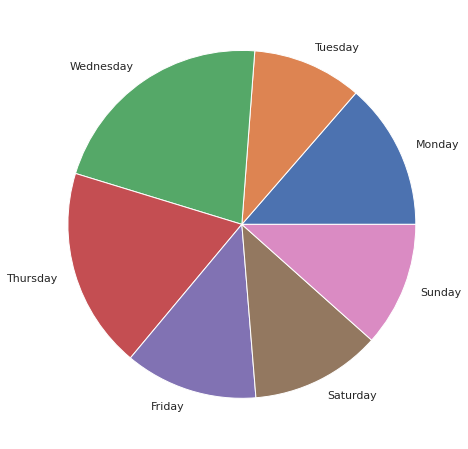

In [ ]:
plt.pie(Duration_hour_sum, labels = day_name)

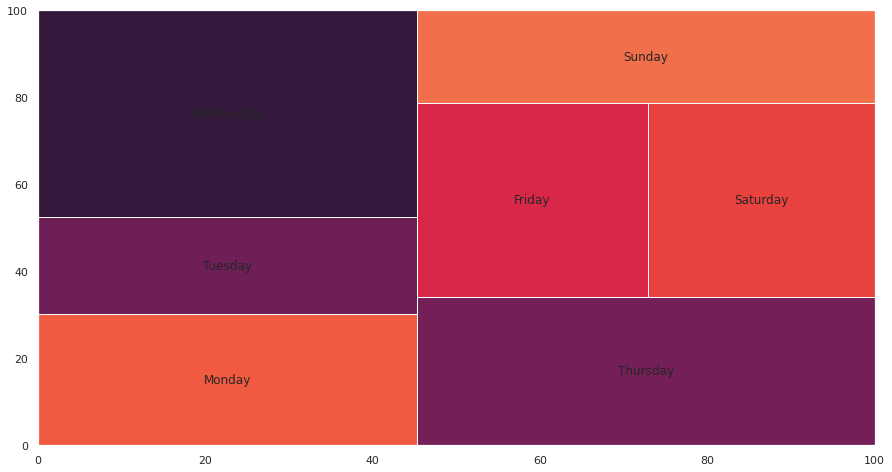

In [ ]:
squarify.plot(sizes=Duration_hour_sum, label = day_name)
plt.show()

# 중복값 제거

## 요일별 본 횟수 시각화

중복 값 제거

In [ ]:
pd.set_option('display.max_columns',None)
Netflix[Netflix.duplicated(["Title", "Year", "Month", "Day"], keep=False)]

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
7,guest,2021-05-30 12:46:21,00:47:35,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),01:10:36,01:10:36,"KR (Korea, Republic of)",2021,5,30,Sunday,12,46,21,00,47,35,2855
8,guest,2021-05-30 11:25:03,00:26:49,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),00:26:49,Not latest view,"KR (Korea, Republic of)",2021,5,30,Sunday,11,25,3,00,26,49,1609
11,guest,2021-05-30 11:19:33,00:00:10,Autoplayed: user action: None;,Law School: Season 1_hook_01_16x9,HOOK,Safari MAC (Cadmium),00:00:18,00:00:18,"KR (Korea, Republic of)",2021,5,30,Sunday,11,19,33,00,00,10,10
12,guest,2021-05-30 11:18:37,00:00:08,Autoplayed: user action: None;,Law School: Season 1_hook_01_16x9,HOOK,Safari MAC (Cadmium),00:00:08,Not latest view,"KR (Korea, Republic of)",2021,5,30,Sunday,11,18,37,00,00,08,8
15,guest,2020-09-26 18:16:04,00:03:18,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:22:15,Not latest view,"KR (Korea, Republic of)",2020,9,26,Saturday,18,16,4,00,03,18,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19148,김지은,2019-02-14 16:44:47,00:37:32,Autoplayed: user action: Unspecified;,그레이스 앤 프랭키: 시즌 1: 종말 (1화),NaN,Safari MAC (Cadmium),00:34:34,Not latest view,"KR (Korea, Republic of)",2019,2,14,Thursday,16,44,47,00,37,32,2252
19149,김지은,2019-02-14 16:42:47,00:00:01,Autoplayed: user action: Unspecified;,그레이스 앤 프랭키: 시즌 1: 종말 (1화),NaN,Safari MAC (Cadmium),00:00:01,Not latest view,"KR (Korea, Republic of)",2019,2,14,Thursday,16,42,47,00,00,01,1
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",2019,2,9,Saturday,4,8,47,00,00,18,18
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,3,10,57,00,00,11,11


In [ ]:
pd.set_option('display.max_columns',None)
Netflix[Netflix.duplicated(["Title", "Year", "Month", "Day"], keep="first")].count()

Profile Name               3451
Start Time                 3451
Duration                   3451
Attributes                 1077
Title                      3451
Supplemental Video Type     342
Device Type                3451
Bookmark                   3451
Latest Bookmark            3451
Country                    3451
Year                       3451
Month                      3451
Day                        3451
Day_name                   3451
Hour                       3451
Minute                     3451
Second                     3451
Duration_hour              3451
Duration_min               3451
Duration_sec               3451
Duration_sec_sum           3451
dtype: int64

In [ ]:
Netflix_noduplication = Netflix.drop_duplicates(["Title", "Year", "Month", "Day"], keep="first")
len(Netflix_noduplication)

15710

In [ ]:
day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [ ]:
Netflix_noduplication.groupby('Day_name').size()

Day_name
Friday       2223
Monday       1497
Saturday     3410
Sunday       2855
Thursday     1953
Tuesday      1909
Wednesday    1863
dtype: int64

### 막대 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


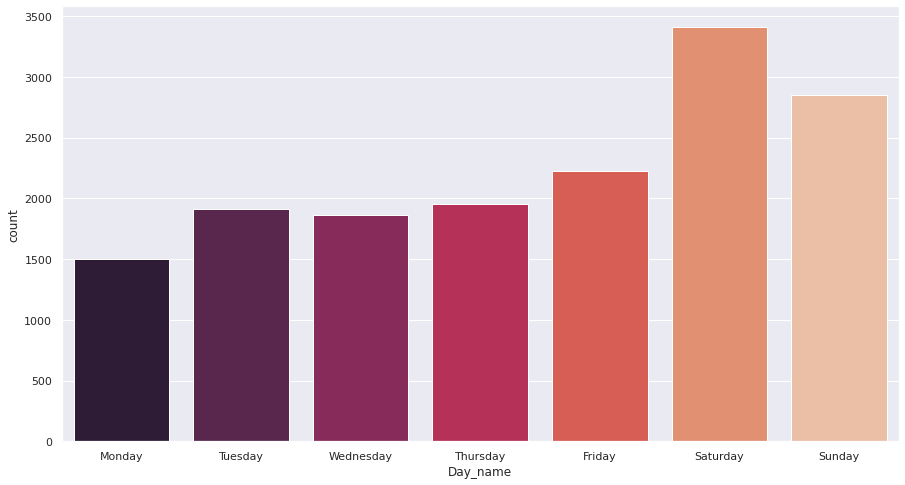

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(Netflix_noduplication["Day_name"], order=day_name, palette="rocket")

### 레이더 차트

In [ ]:
labels = day_name
labels

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
Netflix_noduplication.groupby('Day_name').size()

Day_name
Friday       2223
Monday       1497
Saturday     3410
Sunday       2855
Thursday     1953
Tuesday      1909
Wednesday    1863
dtype: int64

In [ ]:
day_name_df_noduple=pd.DataFrame(Netflix_noduplication.groupby('Day_name').size(),columns=["count"])
day_name_df_noduple

,count
Day_name,
Friday,2223
Monday,1497
Saturday,3410
Sunday,2855
Thursday,1953
Tuesday,1909
Wednesday,1863


In [ ]:
day_name_df_noduple = day_name_df_noduple.reindex(day_name)
day_name_df_noduple

,count
Day_name,
Monday,1497
Tuesday,1909
Wednesday,1863
Thursday,1953
Friday,2223
Saturday,3410
Sunday,2855


No handles with labels found to put in legend.


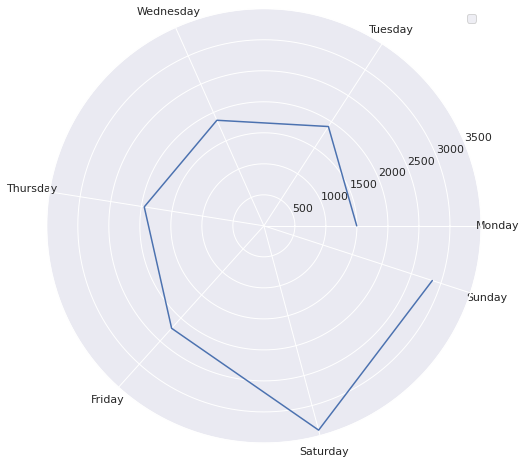

In [ ]:
label_loc = np.linspace(start=0, stop=1.9*np.pi, num=len(day_name_df_noduple))



plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, day_name_df_noduple["count"])
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=day_name)
plt.legend()
plt.show()

## 요일별 드라마 or 영화 어떤걸 많이 보는지

title 과 날짜가 같은 중복값 제거

예고편& 클립 영상 & hook 제거

### 파악해야할 것

 _16x9 & 
 
 Next In Fashion: Season 1 (Rich Hook - Judge Spotlight) & 
 
 Lenox Hill: Season 1_VAR3-CONCRETE1_AGENCY1



In [ ]:
Netflix_noduplication[Netflix_noduplication["Title"].str.contains('_16x9')].count()

Profile Name               1240
Start Time                 1240
Duration                   1240
Attributes                 1080
Title                      1240
Supplemental Video Type    1240
Device Type                1240
Bookmark                   1240
Latest Bookmark            1240
Country                    1240
Year                       1240
Month                      1240
Day                        1240
Day_name                   1240
Hour                       1240
Minute                     1240
Second                     1240
Duration_hour              1240
Duration_min               1240
Duration_sec               1240
Duration_sec_sum           1240
dtype: int64

### 제거

In [ ]:
Netflix_noduplication

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20,00,00,05,5
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38,00,00,04,4
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20,00,00,04,4
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8,00,01,54,114
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48,00,00,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,김지은,2019-02-10 15:33:37,00:01:22,Autoplayed: user action: Unspecified;,파이널 스페이스: 시즌 1: 제1장 (1화),NaN,Safari MAC (Cadmium),00:01:22,Not latest view,"KR (Korea, Republic of)",2019,2,10,Sunday,15,33,37,00,01,22,82
19155,김지은,2019-02-10 15:18:20,00:11:10,Autoplayed: user action: Unspecified;,디스인챈트: 파트 1: 옛날 옛적 공주가 (1화),NaN,Safari MAC (Cadmium),00:13:20,Not latest view,"KR (Korea, Republic of)",2019,2,10,Sunday,15,18,20,00,11,10,670
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,25,19,00,00,23,23
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,20,35,00,00,57,57


In [ ]:
len(Netflix_noduplication)

15710

In [ ]:
Netflix_noduplication[Netflix_noduplication["Title"].str.contains('예고') |
                      Netflix_noduplication["Title"].str.contains('클립') |
                      Netflix_noduplication["Title"].str.contains('CLIP') |
                      Netflix_noduplication["Title"].str.contains('Clip') |
                      Netflix_noduplication["Title"].str.contains('Hook') |
                      Netflix_noduplication["Title"].str.contains('Trailer') |
                      Netflix_noduplication["Title"].str.contains('_16x9')].count()

Profile Name               3100
Start Time                 3100
Duration                   3100
Attributes                 2651
Title                      3100
Supplemental Video Type    3098
Device Type                3100
Bookmark                   3100
Latest Bookmark            3100
Country                    3100
Year                       3100
Month                      3100
Day                        3100
Day_name                   3100
Hour                       3100
Minute                     3100
Second                     3100
Duration_hour              3100
Duration_min               3100
Duration_sec               3100
Duration_sec_sum           3100
dtype: int64

In [ ]:
15710-3100

12610

In [ ]:
Netfilx_no_trailer = Netflix_noduplication[Netflix_noduplication["Title"].str.contains('예고') |
                                           Netflix_noduplication["Title"].str.contains('클립') |
                                           Netflix_noduplication["Title"].str.contains('CLIP') |
                                           Netflix_noduplication["Title"].str.contains('Clip') |
                                           Netflix_noduplication["Title"].str.contains('Hook') |
                                           Netflix_noduplication["Title"].str.contains('Trailer') |
                                           Netflix_noduplication["Title"].str.contains('_16x9') == False]
Netfilx_no_trailer

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38,00,00,04,4
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8,00,01,54,114
7,guest,2021-05-30 12:46:21,00:47:35,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),01:10:36,01:10:36,"KR (Korea, Republic of)",2021,5,30,Sunday,12,46,21,00,47,35,2855
13,guest,2020-09-28 08:51:09,00:41:18,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 5화 (5화),NaN,Safari MAC (Cadmium),00:41:28,00:41:28,"KR (Korea, Republic of)",2020,9,28,Monday,8,51,9,00,41,18,2478
14,guest,2020-09-28 07:54:05,00:57:03,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),01:19:17,01:19:17,"KR (Korea, Republic of)",2020,9,28,Monday,7,54,5,00,57,03,3423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,김지은,2019-02-10 15:33:37,00:01:22,Autoplayed: user action: Unspecified;,파이널 스페이스: 시즌 1: 제1장 (1화),NaN,Safari MAC (Cadmium),00:01:22,Not latest view,"KR (Korea, Republic of)",2019,2,10,Sunday,15,33,37,00,01,22,82
19155,김지은,2019-02-10 15:18:20,00:11:10,Autoplayed: user action: Unspecified;,디스인챈트: 파트 1: 옛날 옛적 공주가 (1화),NaN,Safari MAC (Cadmium),00:13:20,Not latest view,"KR (Korea, Republic of)",2019,2,10,Sunday,15,18,20,00,11,10,670
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,25,19,00,00,23,23
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,20,35,00,00,57,57


In [ ]:
len(Netfilx_no_trailer)

12610

### 제목 - 시즌 - 에피소드 끊어내기

In [ ]:
Title_list = list(Netfilx_no_trailer["Title"])
Title_list

['가질 수 없는 너',
 '자객 오육칠: 시즌 1: 부자가 되는 법 (1화)',
 '라플라스의 마녀',
 '슬기로운 의사생활: 시즌 1: 5화 (5화)',
 '슬기로운 의사생활: 시즌 1: 4화 (4화)',
 '슬기로운 의사생활: 시즌 1: 4화 (4화)',
 '슬기로운 의사생활: 시즌 1: 3화 (3화)',
 '슬기로운 의사생활: 시즌 1: 2화 (2화)',
 '슬기로운 의사생활: 시즌 1: 1화 (1화)',
 '내가 사랑했던 모든 남자들에게: P.S. 여전히 널 사랑해',
 '키싱 부스 2',
 '키싱 부스',
 '키싱 부스 2',
 '릭 앤 모티: 시즌 2: 정화의 날 (9화)',
 '릭 앤 모티: 시즌 2: 외계 TV 프로그램 (8화)',
 '릭 앤 모티: 시즌 2: 부부 상담 (7화)',
 '릭 앤 모티: 시즌 2: 차 배터리 (6화)',
 '릭 앤 모티: 시즌 2: 아마겟돈 (5화)',
 '릭 앤 모티: 시즌 2: 아마겟돈 (5화)',
 '릭 앤 모티: 시즌 2: 기생충 (4화)',
 '릭 앤 모티: 시즌 2: 흡수되다 (3화)',
 '릭 앤 모티: 시즌 2: 모티의 운전 연습 (2화)',
 '릭 앤 모티: 시즌 2: 시간이 분열되다 (1화)',
 '릭 앤 모티: 시즌 2: 시간이 분열되다 (1화)',
 '릭 앤 모티: 시즌 1: 릭스러운 청춘 (11화)',
 '릭 앤 모티: 시즌 1: 미지와의 조우 (10화)',
 '릭 앤 모티: 시즌 1: 이상한 실종 (9화)',
 '릭 앤 모티: 시즌 1: 이상한 실종 (9화)',
 '릭 앤 모티: 시즌 1: 릭스티 미닛 (8화)',
 '릭 앤 모티: 시즌 1: 가조르파조르 돌보기 (7화)',
 '릭 앤 모티: 시즌 1: 릭 포션 넘버 9 (6화)',
 '릭 앤 모티: 시즌 1: 미식스와 파괴 (5화)',
 '릭 앤 모티: 시즌 1: 미식스와 파괴 (5화)',
 '릭 앤 모티: 시즌 1: 농축 암흑 물질 (4화)',
 '릭 앤 모티: 시즌 1: 해부학 파크 (3화)',
 '릭 앤 모티: 시즌 1: 잔디 깎기 

In [ ]:
T_list = []
for i in range(len(Title_list)):
  T_list.append(Title_list[i].split(': '))

In [ ]:
T_list

[['가질 수 없는 너'],
 ['자객 오육칠', '시즌 1', '부자가 되는 법 (1화)'],
 ['라플라스의 마녀'],
 ['슬기로운 의사생활', '시즌 1', '5화 (5화)'],
 ['슬기로운 의사생활', '시즌 1', '4화 (4화)'],
 ['슬기로운 의사생활', '시즌 1', '4화 (4화)'],
 ['슬기로운 의사생활', '시즌 1', '3화 (3화)'],
 ['슬기로운 의사생활', '시즌 1', '2화 (2화)'],
 ['슬기로운 의사생활', '시즌 1', '1화 (1화)'],
 ['내가 사랑했던 모든 남자들에게', 'P.S. 여전히 널 사랑해'],
 ['키싱 부스 2'],
 ['키싱 부스'],
 ['키싱 부스 2'],
 ['릭 앤 모티', '시즌 2', '정화의 날 (9화)'],
 ['릭 앤 모티', '시즌 2', '외계 TV 프로그램 (8화)'],
 ['릭 앤 모티', '시즌 2', '부부 상담 (7화)'],
 ['릭 앤 모티', '시즌 2', '차 배터리 (6화)'],
 ['릭 앤 모티', '시즌 2', '아마겟돈 (5화)'],
 ['릭 앤 모티', '시즌 2', '아마겟돈 (5화)'],
 ['릭 앤 모티', '시즌 2', '기생충 (4화)'],
 ['릭 앤 모티', '시즌 2', '흡수되다 (3화)'],
 ['릭 앤 모티', '시즌 2', '모티의 운전 연습 (2화)'],
 ['릭 앤 모티', '시즌 2', '시간이 분열되다 (1화)'],
 ['릭 앤 모티', '시즌 2', '시간이 분열되다 (1화)'],
 ['릭 앤 모티', '시즌 1', '릭스러운 청춘 (11화)'],
 ['릭 앤 모티', '시즌 1', '미지와의 조우 (10화)'],
 ['릭 앤 모티', '시즌 1', '이상한 실종 (9화)'],
 ['릭 앤 모티', '시즌 1', '이상한 실종 (9화)'],
 ['릭 앤 모티', '시즌 1', '릭스티 미닛 (8화)'],
 ['릭 앤 모티', '시즌 1', '가조르파조르 돌보기 (7화)'],
 ['릭 앤 모티', '시즌 1', '

In [ ]:
title = pd.DataFrame(T_list, columns=["title","season","episode","None","None","None"])
title = title.drop(["None"],axis=1)
title

,title,season,episode
0,가질 수 없는 너,None,None
1,자객 오육칠,시즌 1,부자가 되는 법 (1화)
2,라플라스의 마녀,None,None
3,슬기로운 의사생활,시즌 1,5화 (5화)
4,슬기로운 의사생활,시즌 1,4화 (4화)
...,...,...,...
12605,파이널 스페이스,시즌 1,제1장 (1화)
12606,디스인챈트,파트 1,옛날 옛적 공주가 (1화)
12607,릭 앤 모티,시즌 1,파일럿 에피소드 (1화)
12608,오티스의 비밀 상담소,시즌 1,1화 (1화)


In [ ]:
re_Netflix = pd.concat([Netflix, title],axis =1)
re_Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum,title,season,episode
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20,00,00,05,5,가질 수 없는 너,None,None
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38,00,00,04,4,자객 오육칠,시즌 1,부자가 되는 법 (1화)
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20,00,00,04,4,라플라스의 마녀,None,None
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8,00,01,54,114,슬기로운 의사생활,시즌 1,5화 (5화)
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48,00,00,17,17,슬기로운 의사생활,시즌 1,4화 (4화)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,25,19,00,00,23,23,NaN,NaN,NaN
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,20,35,00,00,57,57,NaN,NaN,NaN
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",2019,2,9,Saturday,4,8,47,00,00,18,18,NaN,NaN,NaN
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,3,10,57,00,00,11,11,NaN,NaN,NaN
